## 데이터 로딩 <hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file = '../data/공정데이터 추가자료.csv'
data = pd.read_csv(file)

## 데이터 전처리 <hr>

In [3]:
# 불필요 컬럼(Unnamed: 12 -> 데이터 값이 없거나 0) 제거
data = data.drop(columns=['Unnamed: 12'])

In [4]:
# 'time' 컬럼 확인
data['time'].info

<bound method Series.info of 0         2023-05-18T15:09:19.018900Z
1         2023-05-18T15:09:20.128150Z
2         2023-05-18T15:12:38.819460Z
3         2023-05-18T15:12:39.958188Z
4         2023-05-18T15:12:41.050178Z
                     ...             
235408    2023-10-16T09:34:12.837701Z
235409    2023-10-16T09:34:13.915681Z
235410    2023-10-16T09:34:14.978068Z
235411    2023-10-16T09:34:16.040468Z
235412    2023-10-16T09:34:17.087220Z
Name: time, Length: 235413, dtype: object>

In [5]:
# 'time' 컬럼을 datetime 형식으로 변환
data['time'] = pd.to_datetime(data['time']).dt.tz_localize(None)

In [6]:
# 10월 1일을 기준으로 데이터 분할
oct_1 = pd.Timestamp('2023-10-01')

In [7]:
# 10월 이전 데이터
before_oct_data = data[data['time'] < oct_1]

In [8]:
# 10월 이후 데이터
after_oct_data = data[data['time'] >= oct_1]

In [9]:
# 10월 이후 데이터 형식 확인
after_oct_data

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
205736,2023-10-05 02:53:30.704112,8,8,69.4,70,40,400,69.6,70,0.0,70.2,70
205737,2023-10-05 02:53:31.813290,8,8,69.4,70,180,1800,69.5,70,0.0,70.3,70
205738,2023-10-05 02:53:32.906953,8,8,69.4,70,179,1790,69.4,70,0.0,70.4,70
205739,2023-10-05 02:53:33.969382,8,8,69.5,70,176,1760,69.4,70,0.0,70.6,70
205740,2023-10-05 02:53:35.047314,8,8,69.4,70,173,1730,69.6,70,0.0,70.7,70
...,...,...,...,...,...,...,...,...,...,...,...,...
235408,2023-10-16 09:34:12.837701,8,8,69.8,70,191,1910,67.5,70,0.0,67.0,70
235409,2023-10-16 09:34:13.915681,8,8,69.7,70,191,1910,67.4,70,0.0,66.8,70
235410,2023-10-16 09:34:14.978068,8,8,69.7,70,191,1910,67.3,70,0.0,66.7,70
235411,2023-10-16 09:34:16.040468,8,8,69.8,70,191,1910,67.2,70,0.0,66.6,70


### 피쳐공학적 접근에 따른 데이터 => set_data <hr>

In [10]:
# 불규칙적으로 측정된 'time' 컬럼 제거
set_data = after_oct_data.drop(columns=['time'])
set_data

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
205736,8,8,69.4,70,40,400,69.6,70,0.0,70.2,70
205737,8,8,69.4,70,180,1800,69.5,70,0.0,70.3,70
205738,8,8,69.4,70,179,1790,69.4,70,0.0,70.4,70
205739,8,8,69.5,70,176,1760,69.4,70,0.0,70.6,70
205740,8,8,69.4,70,173,1730,69.6,70,0.0,70.7,70
...,...,...,...,...,...,...,...,...,...,...,...
235408,8,8,69.8,70,191,1910,67.5,70,0.0,67.0,70
235409,8,8,69.7,70,191,1910,67.4,70,0.0,66.8,70
235410,8,8,69.7,70,191,1910,67.3,70,0.0,66.7,70
235411,8,8,69.8,70,191,1910,67.2,70,0.0,66.6,70


### 모든 설정값이 동일한 s_temp_sv와 c_temp_sv컬럼 drop <hr>

In [11]:
# s_temp_sv와 c_temp_sv 컬럼 제거
set_data = set_data.drop(columns=['s_temp_sv', 'c_temp_sv'])
set_data

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv
205736,8,8,69.4,40,400,69.6,70,0.0,70.2
205737,8,8,69.4,180,1800,69.5,70,0.0,70.3
205738,8,8,69.4,179,1790,69.4,70,0.0,70.4
205739,8,8,69.5,176,1760,69.4,70,0.0,70.6
205740,8,8,69.4,173,1730,69.6,70,0.0,70.7
...,...,...,...,...,...,...,...,...,...
235408,8,8,69.8,191,1910,67.5,70,0.0,67.0
235409,8,8,69.7,191,1910,67.4,70,0.0,66.8
235410,8,8,69.7,191,1910,67.3,70,0.0,66.7
235411,8,8,69.8,191,1910,67.2,70,0.0,66.6


### 2차 미팅 결과 E_scr_sv가 8이 아닌 다른 값으로 셋팅된 것은 다른 제품에 대한 셋팅값으로 판단. 
### 따라서 E_scr_sv가 8인 값만 남김 <hr>

In [12]:
# E_scr_sv 값이 8인 행만 남기기
set_data = set_data[set_data['E_scr_sv'] == 8]

### E_scr_sv 값이 모두 8이므로 학습에 변화량을 제공하지 않아 삭제 <hr>

In [13]:
# E_scr_sv 컬럼 제거
set_data = set_data.drop(columns=['E_scr_sv'])

### E_scr_sv 컬럼 삭제 후 확인 시 n_temp_sv 컬럼이 모두 같은 값으로 통일되었기에 해당 컬럼을 삭제 <hr>

In [14]:
# n_temp_sv 컬럼 제거
set_data = set_data.drop(columns=['n_temp_sv'])

### 남은 컬럼 E_scr_pv, c_temp_pv, k_rpm_pv, k_rpm_sv, n_temp_pv, scale_pv, s_temp_pv 
### 값들에 대해 하나하나 확인  후 전처리 실행 <hr>

#### E_scr_pv의 고유값의 종류가 적음을 그래프로 확인 -> 세부정보 파악

In [15]:
# E_scr_pv 컬럼의 고유값 확인
unique_values = set_data['E_scr_pv'].unique()
print("E_scr_pv 컬럼의 고유값:")
print(unique_values)

E_scr_pv 컬럼의 고유값:
[8]


In [16]:
# E_scr_pv 값이 8인 경우와 0인 경우로 데이터 나누기
data_8 = set_data[set_data['E_scr_pv'] == 8]
data_0 = set_data[set_data['E_scr_pv'] == 0]

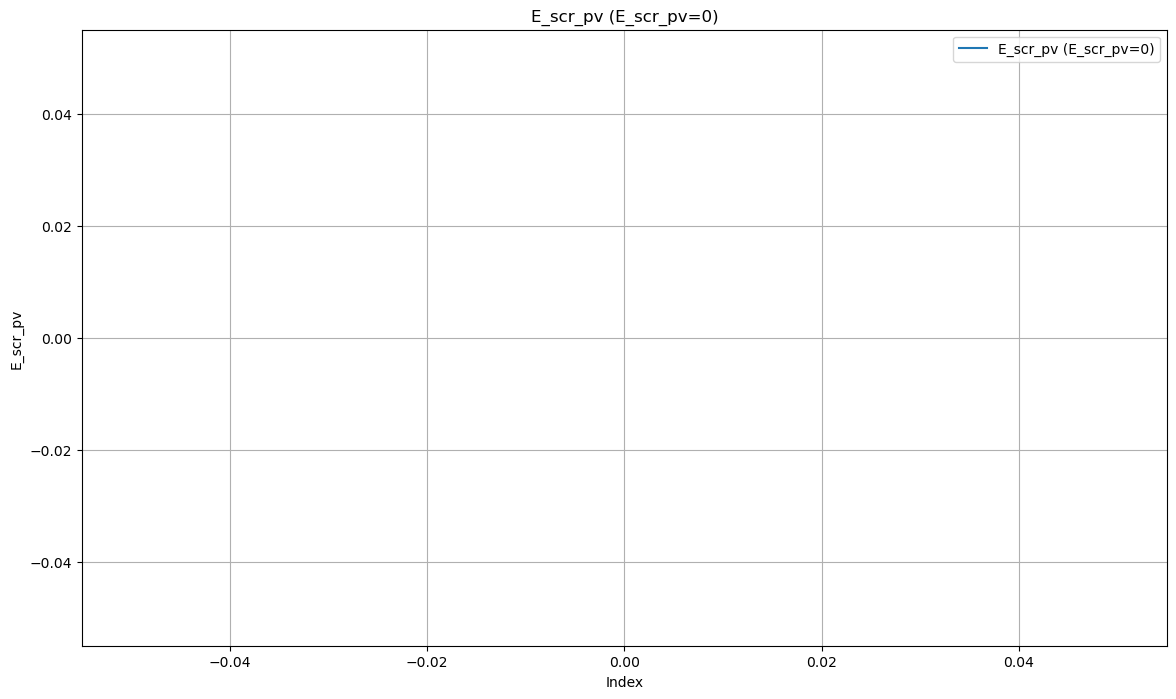

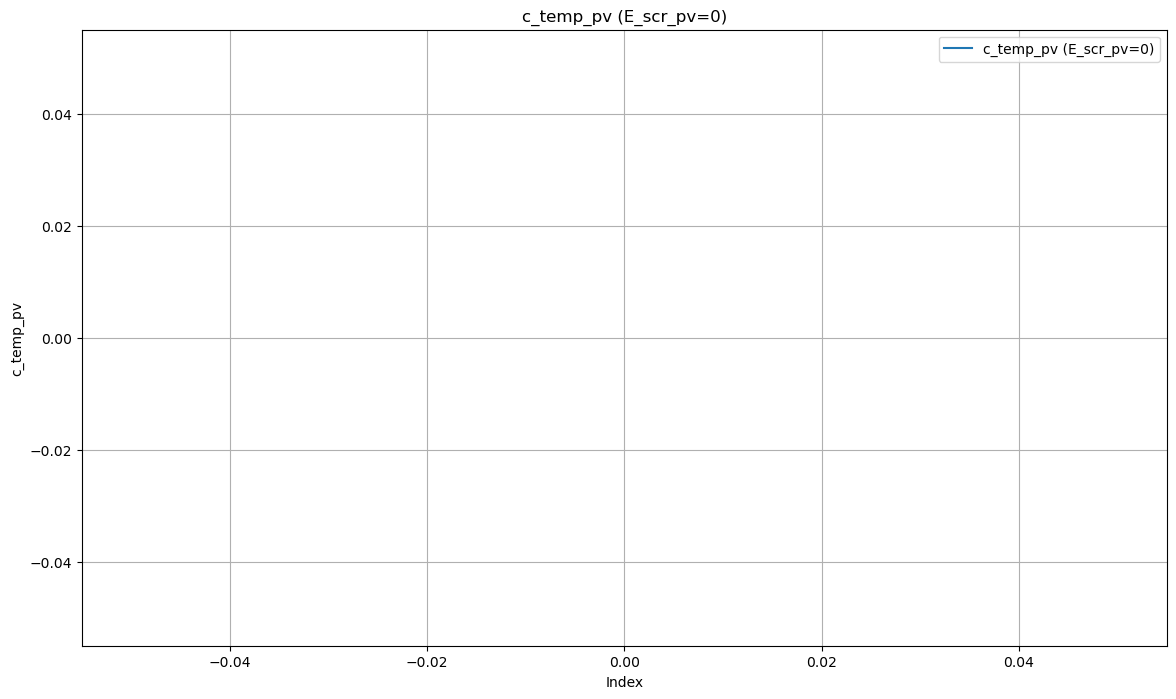

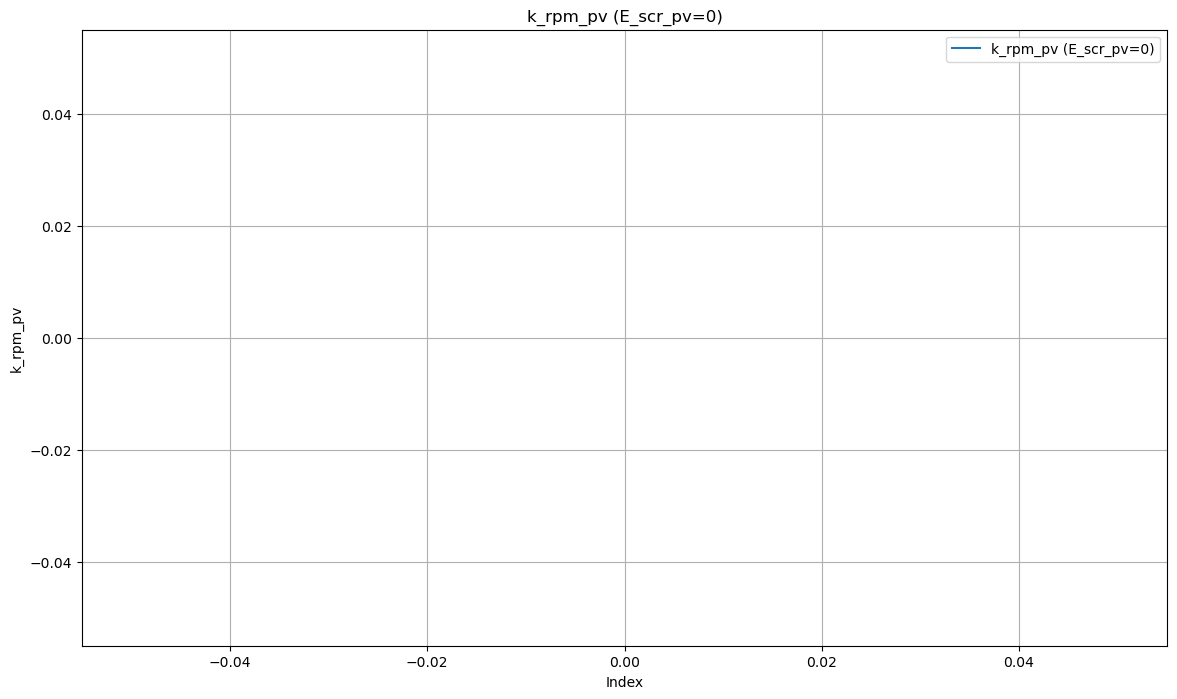

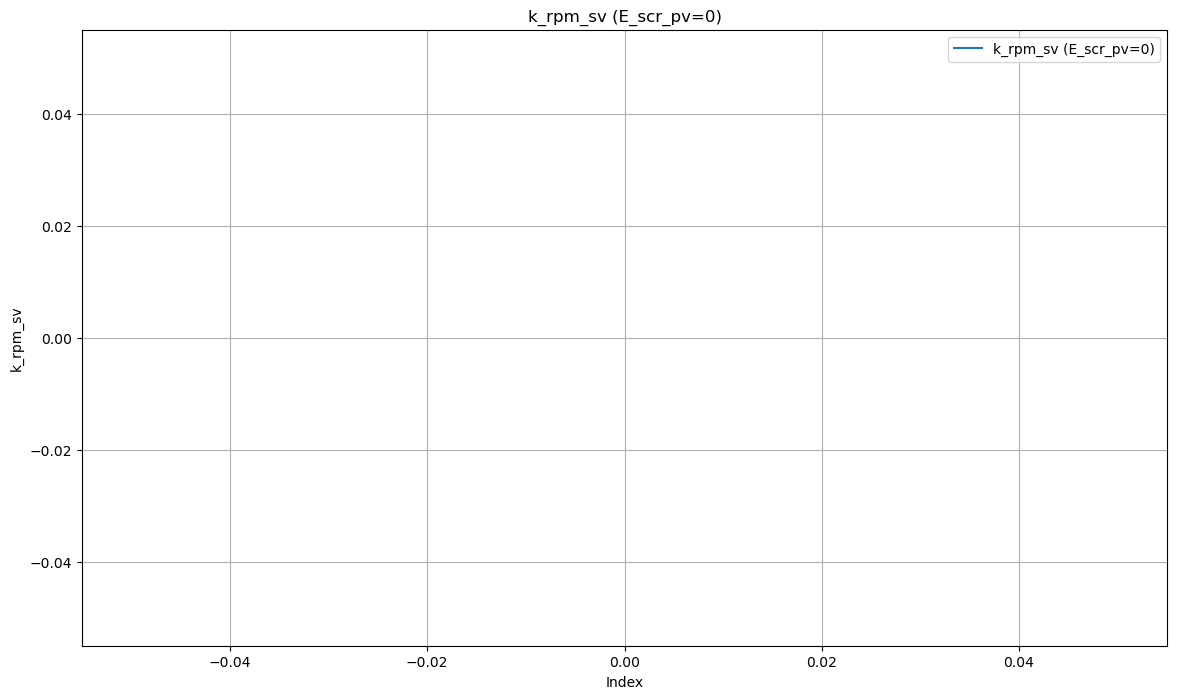

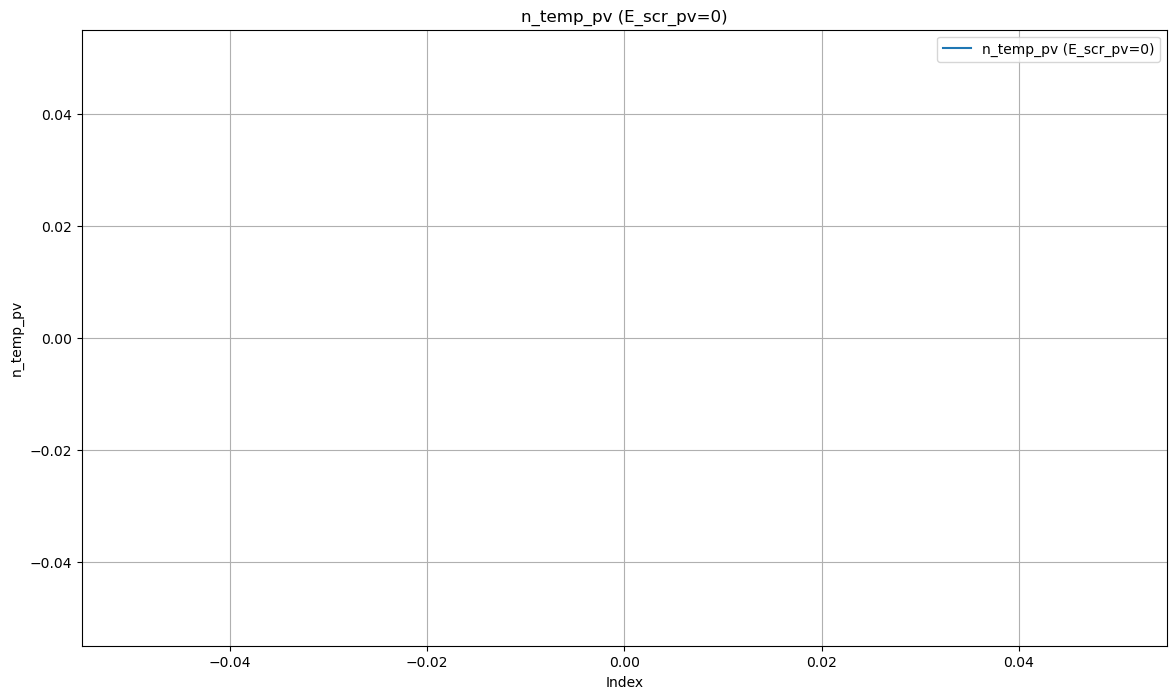

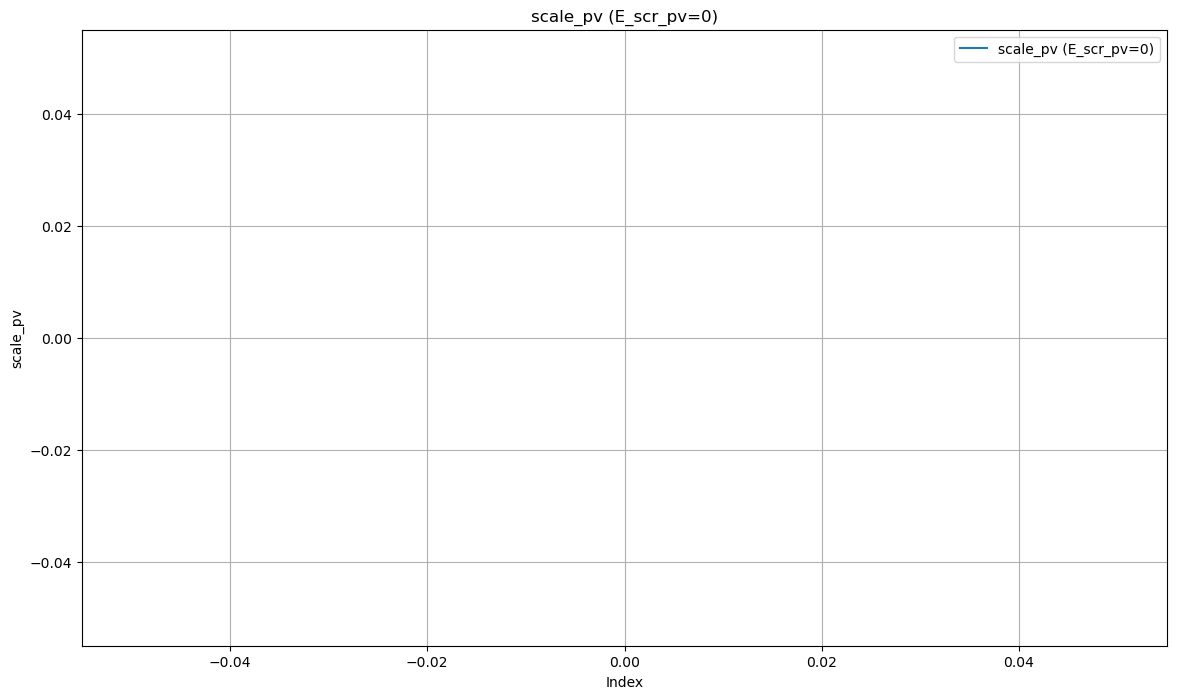

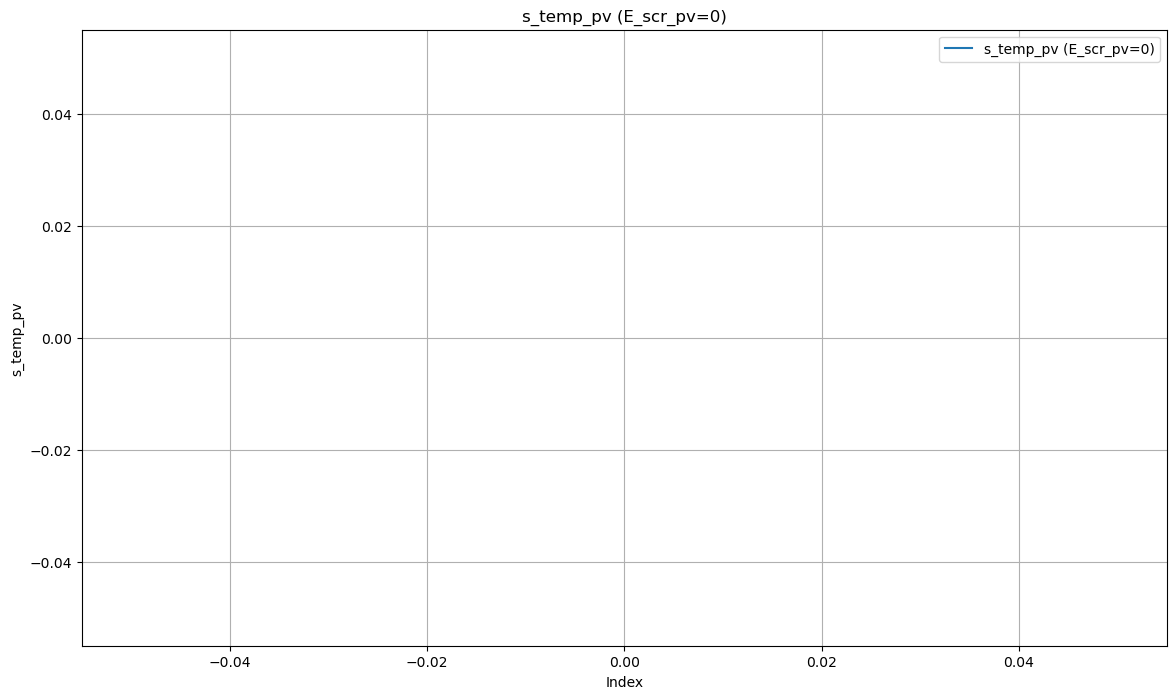

In [17]:
# E_scr_pv 값이 0인 경우의 각 컬럼별 그래프 그리기
for column in data_0.columns:
    plt.figure(figsize=(14, 8))
    plt.plot(data_0.index, data_0[column], label=f'{column} (E_scr_pv=0)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'{column} (E_scr_pv=0)')
    plt.legend()
    plt.grid(True)
    plt.show()

### 위의 경우 k_rpm_pv가 모두 0이고, scale_pv값이 0 또는 600이상 값으로만 나옴 <hr>

In [18]:
### scale_pv 값이 600 이상인 행은 기준이 되는 3과 너무 큰 차이가 나므로 측정 오류로 판단, 모두 삭제
test_data = set_data[set_data['scale_pv'] < 600]

### 남은 자료들에 대한 그래프 확인 <hr>

In [19]:
### scale_pv 값이 4 이상인 행 또한 측정 오류로 판단, 모두 삭제
test_data = test_data[test_data['scale_pv'] < 4]

### c_temp_pv 값이 혼자 65.1인 날 E_scr_pv, k_rpm_pv, scale_pv값이 모두 0이므로 삭제<hr>

In [20]:
### c_temp_pv 값이 68 미만인 행 삭제
test_data = test_data[test_data['c_temp_pv'] >= 68]

### 실제 칼날 회전수로 파악하는 방식 결정 <hr>

In [21]:
# k_rpm_sv 컬럼 제거
test_data = test_data.drop(columns=['k_rpm_sv'])

In [22]:
# k_rpm_pv 값이 50 미만인 행 필터링
filtered_k_rpm_pv_data = test_data[test_data['k_rpm_pv'] < 50]

# 필터링된 데이터 확인
print("k_rpm_pv 값이 50 미만인 행:")
print(filtered_k_rpm_pv_data.head())

k_rpm_pv 값이 50 미만인 행:
        E_scr_pv  c_temp_pv  k_rpm_pv  n_temp_pv  scale_pv  s_temp_pv
205736         8       69.4        40       69.6       0.0       70.2
207012         8       70.2         0       67.7       0.0       66.5
207013         8       69.0        40       70.3       0.0       68.4
207014         8       69.0        40       70.2       0.0       68.5
207015         8       69.0        40       70.1       0.0       68.7


### E_scr_pv값이 0인 모든 케이스가  k_rpm_sv값이 50미만에 포함, 해당 값들은 scale_pv도 대부분 0 이므로 삭제 <hr>

### -> E_scr_pv 모두 8이라 의미가 없으므로 E_scr_pv 삭제 <hr>

In [23]:
# E_scr_pv 컬럼 제거
test_data = test_data.drop(columns=['E_scr_pv'])

### 다음 절차로 k_rpm_pv값에 대한 접근 -> 50미만 값들은 타겟이 3g인 값들에 대한 k_rpm_sv값 차이가 커 오류로 판단 <hr>

In [24]:
# scale_pv 값이 50 미만인 행 삭제
test_data = test_data[test_data['k_rpm_pv'] >= 50]

### 다음으로, scale_pv에 대한 접근 -> 고유값 우선 확인 <hr>

In [25]:
# scale_pv 컬럼의 고유값 확인
unique_scale_pv_values = test_data['scale_pv'].unique()
print("scale_pv 컬럼의 고유값:")
print(unique_scale_pv_values)

scale_pv 컬럼의 고유값:
[0.   3.06 3.16 3.17 3.14 3.09 3.07 3.05 3.08 3.03 3.04 3.02 2.95 3.01
 3.15 3.   2.99 2.97 3.1  3.18 3.11 2.96 3.13 2.85 2.98 3.28 3.12 3.19
 3.27]


In [26]:
# 오름차순 정렬
unique_scale_pv_values = np.sort(test_data['scale_pv'].unique())
print('sclae_pv 컬럼의 고유값(오름차순):')
print(unique_scale_pv_values)

sclae_pv 컬럼의 고유값(오름차순):
[0.   2.85 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06
 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.19 3.27
 3.28]


### scale_pv값이 0 인 경우 미측정, 나머지 0 초과 2 이하의 경우 측정오류로 판단, 제거 <hr>

In [27]:
# scale_pv 값이 0 초과 2 이하인 행 삭제
test_data = test_data[(test_data['scale_pv'] == 0) | (test_data['scale_pv'] > 2)]

# 필터링된 데이터 확인
print("scale_pv 값이 0 초과 2.5 미만인 행 삭제 후 데이터:")
print(test_data.head())

scale_pv 값이 0 초과 2.5 미만인 행 삭제 후 데이터:
        c_temp_pv  k_rpm_pv  n_temp_pv  scale_pv  s_temp_pv
205737       69.4       180       69.5       0.0       70.3
205738       69.4       179       69.4       0.0       70.4
205739       69.5       176       69.4       0.0       70.6
205740       69.4       173       69.6       0.0       70.7
205741       69.5       173       69.4       0.0       70.8


In [28]:
over_s_temp_pv = test_data[test_data['s_temp_pv'] > 72]
over_s_temp_pv

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv


In [29]:
# CSV 파일로 저장
output_file = '../data_final/Test_data.csv'
test_data.to_csv(output_file, index=False)